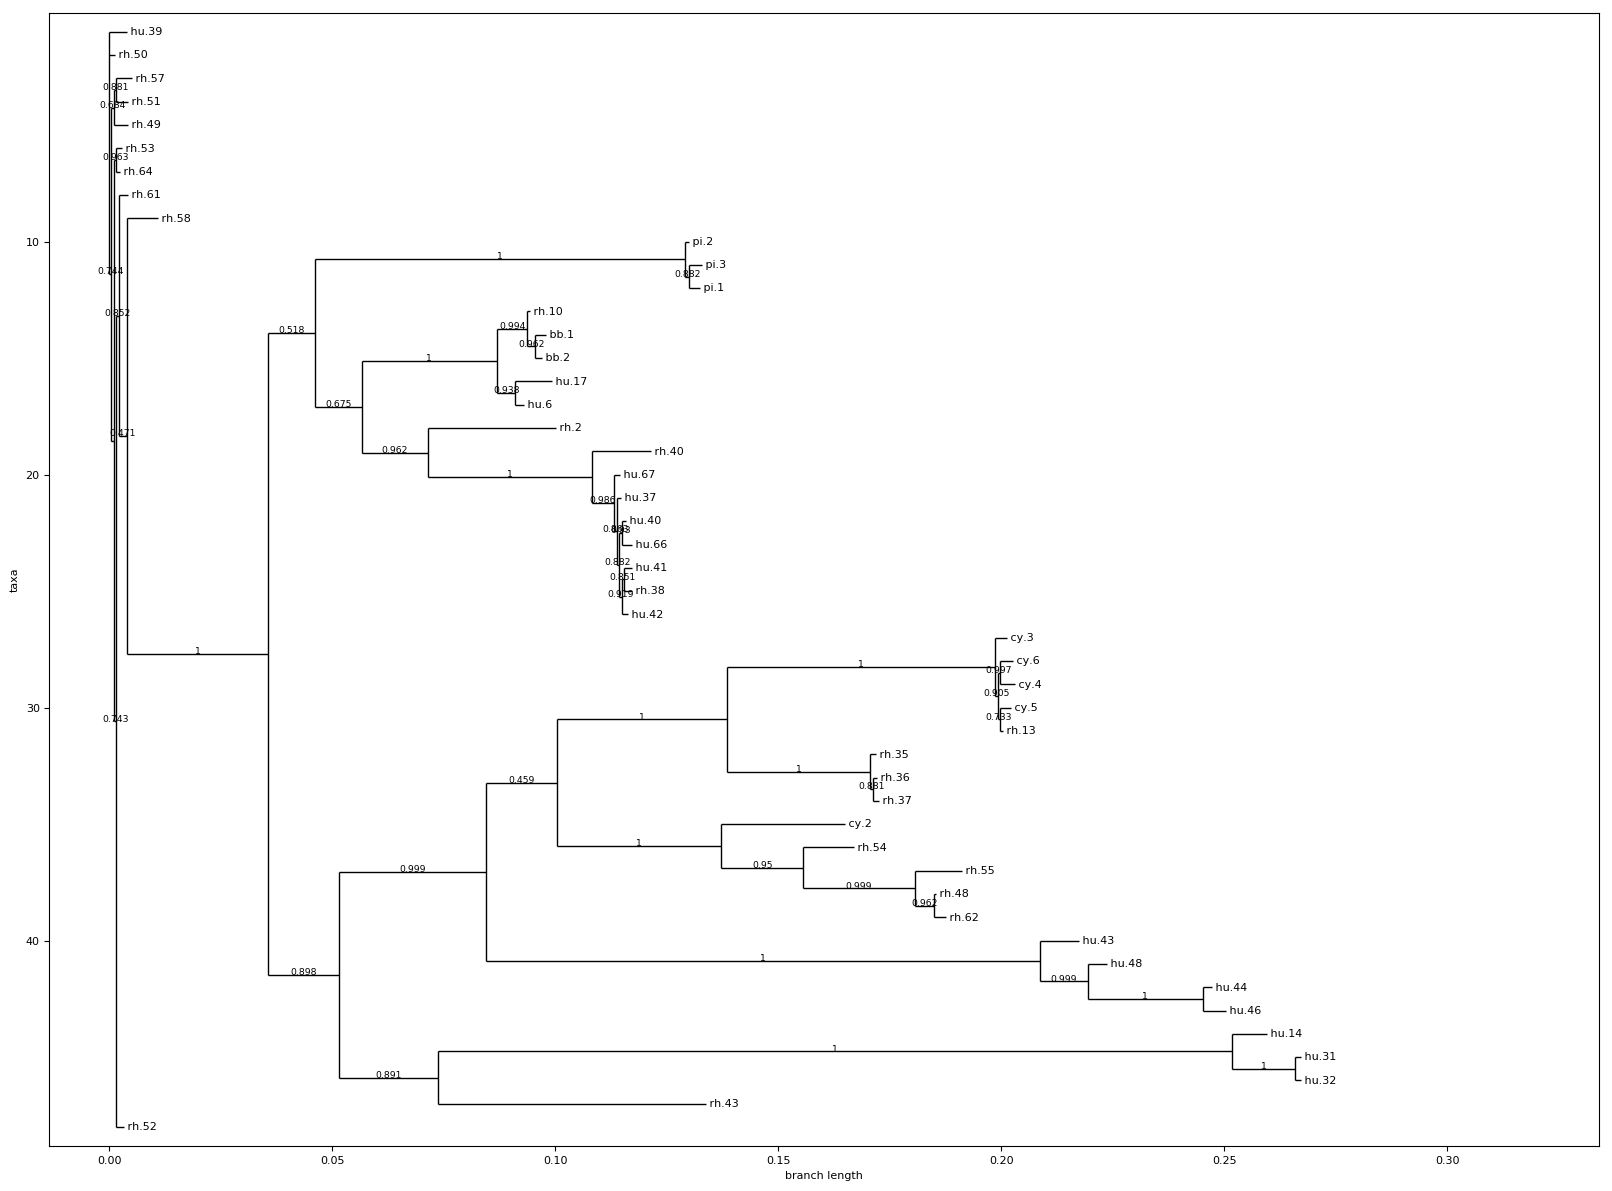

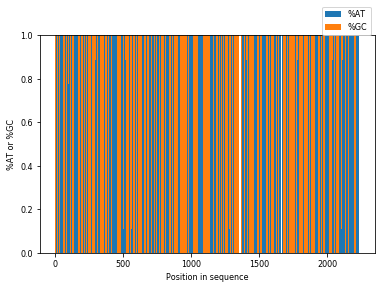

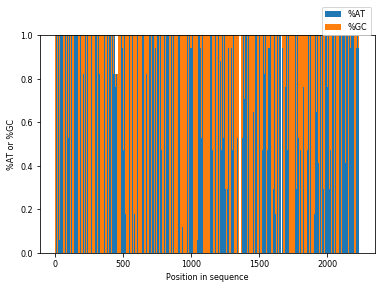

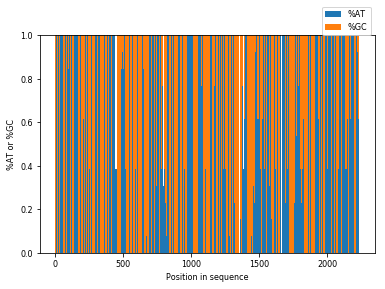

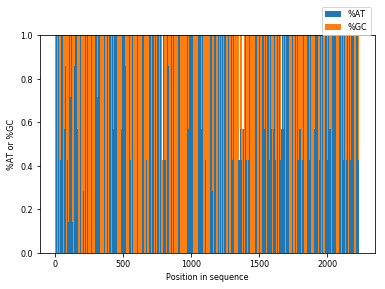

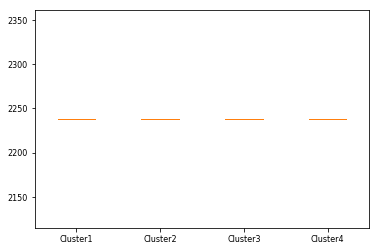

In [ ]:
from Bio import SeqIO
from matplotlib import pyplot as plt
from Bio import Phylo
import matplotlib

%matplotlib inline
# Draw tree from seqs.aligned.fa.
tree = Phylo.read("tree.nwk","newick")
matplotlib.rc('font', size=8)
fig = plt.figure(figsize=(20, 15), dpi=100)
axes = fig.add_subplot(1, 1, 1)
matplotlib.rcParams['lines.linewidth'] = 1
a = Phylo.draw(tree, axes = axes)

x_axis = []
for i in range(1, 2239):
    x_axis.append(i)

def calAT(lis):
    """ Return the ratio of A+T in each sequence in a list"""
    my_ratio = []
    for seq in lis:
        count = 0
        for i in seq:
            if i == 'a' or i == "t":
                count += 1
        ratio = count / len(seq)
        my_ratio.append(ratio)
    return my_ratio

def calCG(lis):
    """ Return the ratio of A+T in each sequence in a list"""
    my_ratio = []
    for seq in lis:
        count = 0
        for i in seq:
            if i == 'c' or i == "g":
                count += 1
        ratio = count / len(seq)
        my_ratio.append(ratio)
    return my_ratio

def calAT1(list):
    """
    Input the comparision sequences.
    Return a list that contains elements of the ratio of A + T in each position of the sequences.
    """
    k = 0
    my_ratio = []
    while k < len(list[0]):
        count = 0
        i = 0
        while i < len(list):
            if list[i][k] == "A" or list[i][k] == "T" :
                count += 1
            i += 1
        ratio = count / len(list)
        k += 1
        my_ratio.append(ratio)
    return my_ratio

def calCG1(list):
    """
       Input the comparision sequences.
       Return a list that contains elements of the ratio of C + G in each position of the sequences.
       """
    k = 0
    my_ratio = []
    while k < len(list[0]):
        count = 0
        i = 0
        while i < len(list):
            if list[i][k] == "C" or list[i][k] == "G" :
                count += 1
            i += 1
        ratio = count / len(list)
        k += 1
        my_ratio.append(ratio)
    return my_ratio



def Out_id_seq(*str):
    """Return two lists, the first one contains information of id, and the second one for sequence."""
    my_ids = []
    my_seq = []

    for seq in SeqIO.parse("seqs.aligned.fa","fasta"):
        for name in str:
            if seq.id == name:
                my_ids.append(seq.id)
                my_seq.append(seq.seq)
    return  my_ids,my_seq

def draw_ATCG_bar(sequence):
    """Input the list of the name of sequence and the sequence itself, and then return the %AT and %CG in the sequence
    in the form of a stacked bar.
    """
    height_AT = calAT1(sequence)
    height_CG = calCG1(sequence)
    p1 = plt.bar(height=height_AT, width = 1, x = x_axis)
    p2 = plt.bar(height=height_CG, bottom=height_AT, width = 1, x = x_axis)
    plt.ylabel('%AT or %GC')
    plt.xlabel('Position in sequence')
    plt.legend((p1[0], p2[0]), ('%AT', '%GC'), bbox_to_anchor=(1,1.15))
    return plt.show(p1, p2)

name1, sequence1 = Out_id_seq("hu.39","rh.50","rh.57","rh.51","rh.49","rh.53","rh.64","rh.61","rh.58")
name2, sequence2 = Out_id_seq("pi.1","pi.2","pi.3","rh.10","bb.1","bb.2","hu.17","hu.6", "rh.2", "rh.40", "hu.67", "hu.37", "hu.40", "hu.66", "hu.41", "rh.38", "hu.42")
name3, sequence3 = Out_id_seq("cy.3","cy.4","cy.5","cy.6","rh.13", "rh.35", "rh.36","rh.37","cy.2", "rh.54", "rh.55", "rh.48", "rh.62")
name4, sequence4 = Out_id_seq("hu.43","hu.48","hu.44", "hu.46", "hu.14", "hu.31","hu.32")

def count_len(sequence):
    """Input the lists of sequence, then output the length of each sequence in the list"""
    leng = []
    for i in sequence:
        leng.append(len(i))
    return leng

leng1 = count_len(sequence1)
leng2 = count_len(sequence2)
leng3 = count_len(sequence3)
leng4 = count_len(sequence4)

data = [leng1, leng2, leng3, leng4]

draw_ATCG_bar(sequence1)
draw_ATCG_bar(sequence2)
draw_ATCG_bar(sequence3)
draw_ATCG_bar(sequence4)

plt.boxplot(data, labels = ['Cluster1', 'Cluster2','Cluster3','Cluster4'])
plt.show()



#Lab 2
After generating the phylogenetic tree for the sequences in **seq.fa**, I find there are some apparent clusters in this tree in which I highlight them by drawing a red cycle on them.
![](https://i.imgur.com/GCJ2iU7.jpg)

Then, I choose a specimen from each cluster to do the identification by using BLAST.

For sequence **hu.39**, the result is shown as followed:
![](https://i.imgur.com/vABHps9.png)

For sequence **pi.1**, the result is shown as followed:
![](https://i.imgur.com/mlKl7R7.png)

For sequence **rh.35**, the result is shown as followed:
![](https://i.imgur.com/i7c1YEd.png)

For sequence **hu.43**, the result is shown as followed:
![](https://i.imgur.com/aRrOGmW.png)

From the results above, it is clearly seen that through BLAST, I find the most matched sequence whose identities up to 100% in the database online. However, BLAST is able to generate several matches and rank them in the order of identities. For example, for sequence **rh.35**, according to the default configuration, 100 matches are shown in the results (each red line represents a gene sequence):
![](https://i.imgur.com/7wwBKSV.png)

As is shown above, we can see almost all the matched sequences in the database get high alignment scores, though they actually represent different genes. Therefore, it is believed that sometimes the result from BLAST is less convincing for it has enormous data, and some gene sequences are only different from each other for 1%-10% nucleotides, which are also screened as matches by BLAST, though they represent different genes.

Then, I analyze the %AT and %CG in each cluster I have marked in the begining and generate the following four figures:

For **cluster1**：
![](https://i.imgur.com/OICpVef.png)

For **cluster2**：
![](https://i.imgur.com/pH78MUG.png)

For **cluster3**：
![](https://i.imgur.com/d2jCyo2.png)

For **cluster4**：
![](https://i.imgur.com/bybkplF.png)

Next, I calculate the length of each sequence in all four clusters, and then draw a boxplot shown as follows:

For the data in **seqs.fa**:
![](https://i.imgur.com/NsTrCBR.png)

For the data in **seqs.aligned.fa**:
![](https://i.imgur.com/qCNWRcw.png)

It is clearly shown that the length of sequences increases and reaches the same value after multiple sequence alignment process.